# HW 2

## See PDF for solutions to 1.1, 1.2, 2.2 and 2.2

In [1]:
import numpy as np

import sympy
from sympy import simplify, Function
from sympy import symbols, pprint
from sympy import sin, cos, asin, acos, pi
from sympy import Matrix, diff

from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
plt.ion()


# Rigid body dynamics

## Examine the torque-free rigid body equations

Simulate the torque-free Euler equation in the body reference frame to solve for $\omega_{B}(t)$ as a function of time. 

1. Write a helper function called **cross_matrix(vec)** which takes in a vector $v$ and returns the cross-product matrix representation $\left[v\right]_{\times}$.

2. Write a helper function called **uncross_matrix(mat)** which takes in a cross-product matrix $m$ and returns the vector components.

3. Write a dynamics function called **omega_dot(t, omega, I_B)** which is a function of time (unused), omega, and body-system moment of inertia $I_B$. 
    The function should compute $\dot{\omega}$ from the torque-free Euler equation 
    \begin{align*}
        I_B \dot{\omega}_B + \left[\omega_B\right]_{\times} I_B \omega_B = 0 \quad \rightarrow \quad \dot{\omega}_B = -I_B^{-1} \left(\left[\omega_B\right]_{\times} I_B \omega_B\right)
    \end{align*}
    and should return $\dot{\omega}_B$ as a row vector.

4. Use the sample code from lecture to numerically integrate the equation of motion ($\dot{\omega} = -I_B^{-1} \left(\left[\omega\right]_{\times} I_B \omega\right)$) to solve for $\omega_B(t)$.
    Use a moment of inertia of 
    \begin{align}
        I_B = \left[\begin{array}{ccc} 10 & 0 & 0 \\ 0 & 5 & 0 \\ 0 & 0 & 1 \end{array}\right]
    \end{align}
    Provide a plot of the components of $\omega_B$ versus time over a 10s time period, with $w_{B}(t = 0) = [0.9., 0.1, 0]^T$ and $w_{B}(t = 0) = [0.1., 0.9, 0]^T$.

5. Calculate the angular kinetic energy over time and provide a plot of energy versus time.    
    

## Define cross and uncross helper functions

In [2]:
def cross_matrix(vec):
    
    return np.matrix([[0, -vec[2,0], vec[1,0]],
                      [vec[2,0], 0, -vec[0,0]],
                      [-vec[1,0], vec[0,0], 0]])

def uncross_matrix(mat):
    
    return np.matrix([[ww[2,1]],
                      [ww[0,2]], 
                      [-ww[0,1]]])
    

## Define the dynamics equation for the torque-free rigid body

In [3]:
def omega_dot(t, state, I_B):
    
    omega = np.matrix(state).T
    
    omega_dot = np.linalg.inv(I_B) @ (-cross_matrix(omega) @ I_B @ omega)
    
    return omega_dot.T

## Simulate $w_{B}(t = 0) = [0.9., 0.1, 0]^T$ 

Text(0.5, 0, 'time')

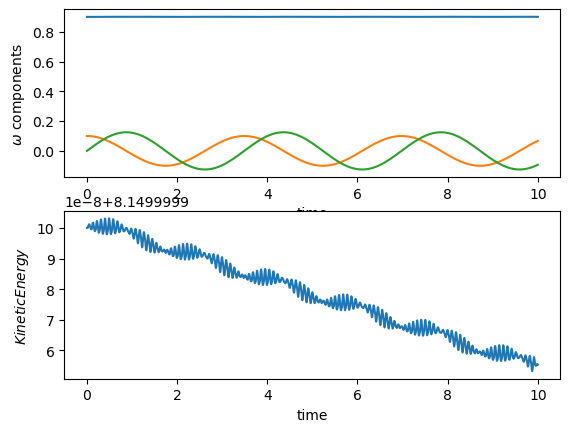

In [4]:
lambda1 = 10
lambda2 = 5
lambda3 = 2

I_B = np.matrix([[lambda1, 0, 0], 
                 [0, lambda2, 0],
                 [0, 0, lambda3]]);

t_end = 10

time = np.linspace(0, t_end, 10000)

init = [.9, 0.1, 0]
init_mat = np.matrix(init).T

E_total =  0.5*(init_mat.T @ I_B @ init_mat)[0,0]

sol = solve_ivp(lambda t, state: omega_dot(t, state, I_B), 
                [0,t_end], init, 
                t_eval = time, 
                rtol=1e-8, atol = 1e-8)

kinetic_energy = [(w.T @ I_B @ w).item() for w in sol.y.T]

plt.subplot(2,1,1)
plt.plot(sol.t, sol.y.T)
plt.ylabel('$\omega$ components')
plt.xlabel('time')

plt.subplot(2,1,2)
plt.plot(sol.t, kinetic_energy)
plt.ylabel('$Kinetic Energy$')
plt.xlabel('time')

## Simulate $w_{B}(t = 0) = [0.1, 0.9, 0]^T$ 

Text(0.5, 0, 'time')

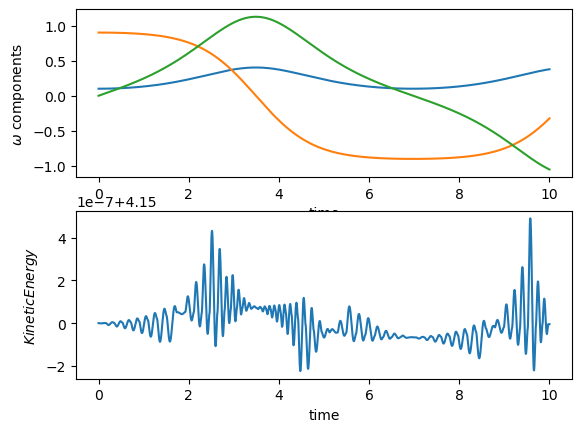

In [5]:
lambda1 = 10
lambda2 = 5
lambda3 = 2

I_B = np.matrix([[lambda1, 0, 0], 
                 [0, lambda2, 0],
                 [0, 0, lambda3]]);

t_end = 10

time = np.linspace(0, t_end, 10000)

init = [.1, 0.9, 0]
init_mat = np.matrix(init).T

E_total =  0.5*(init_mat.T @ I_B @ init_mat)[0,0]

sol = solve_ivp(lambda t, state: omega_dot(t, state, I_B), 
                [0,t_end], init, 
                t_eval = time, 
                rtol=1e-8, atol = 1e-8)

kinetic_energy = [(w.T @ I_B @ w).item() for w in sol.y.T]

plt.subplot(2,1,1)
plt.plot(sol.t, sol.y.T)
plt.ylabel('$\omega$ components')
plt.xlabel('time')

plt.subplot(2,1,2)
plt.plot(sol.t, kinetic_energy)
plt.ylabel('$Kinetic Energy$')
plt.xlabel('time')

# Required and optional reading

Use your Python tools to verify the rotation matrix $\mathbf{R}$ on page 5, and the mapping between euler rates and $\omega$ in equation 6.

In the paper it is stated that the convention they use is:

We parameterize Euler Angles in $z y x$-order: the attitude is obtained by first rotating by an angle $\theta_3$ yaw around the body $z$-axis, then by $\theta_2$ pitch around the new body $y$-axis, and then by $\theta_1$ roll around the new body $x$-axis. Therefore, the rotation matrix, 

$$
\textbf{R} = \left[\begin{array}{ccc}
c \theta_2 c \theta_3 & s \theta_1 s \theta_2 c \theta_3-s \theta_3 c \theta_1 & s \theta_1 s \theta_3+s \theta_2 c \theta_1 c \theta_3 \\
s \theta_3 c \theta_2 & s \theta_1 s \theta_2 s \theta_3+c \theta_1 c \theta_3 & -s \theta_1 c \theta_3+s \theta_2 s \theta_3 c \theta_1 \\
-s \theta_2 & s \theta_1 c \theta_2 & c \theta_1 c \theta_2
\end{array}\right]
$$



### Define rotations angles

In [6]:
# We wrap in parentheses here so we can write it on multiple lines. Similar
# with the triple quotes on the string. Usually we don't need to use these things.
(t, 
 theta_1, 
 theta_2, 
 theta_3) = symbols("""t, 
                    theta_1,
                    theta_2,
                    theta_3""" , real = True)

# Make rotation angles functions of time so we can take derivatives

In [7]:
theta_1 = Function('theta_1', real=True)(t)
theta_2 = Function('theta_2', real=True)(t)
theta_3 = Function('theta_3', real=True)(t)

# Define rotation matrices

In [8]:
def R_z(theta):
    """
    Function to return an arbitrary transformation matrix 
    This is for sympy symbolic calculation
    """
    return Matrix([[cos(theta), -sin(theta), 0], 
                   [sin(theta), cos(theta), 0],
                   [0, 0, 1]])


def R_y(theta):
    """
    Function to return an arbitrary transformation matrix 
    This is for sympy symbolic calculation
    """
    return Matrix([[cos(theta),0, sin(theta)], 
                   [0, 1, 0],
                   [-sin(theta), 0, cos(theta)]])

def R_x(theta):
    """
    Function to return an arbitrary transformation matrix 
    This is for sympy symbolic calculation
    """
    return Matrix([[1, 0, 0],
                   [0, cos(theta), -sin(theta)], 
                   [0, sin(theta), cos(theta)]])


### Construct the total rotation matrix from the zyx sequence in the body frame

Remember in the body frame the matrix order is reversed, so zyx body frame rotations is given by 
$$
R = R_z(\theta_3) R_y(\theta_2) R_x(\theta_1)
$$
Note that this "looks" like a rotation first about x, then about y, then about z in the spatial frame. This is why it is reversed.

In [9]:
R = R_z(theta_3) @ R_y(theta_2) @ R_x(theta_1)
R

Matrix([
[cos(theta_2(t))*cos(theta_3(t)), sin(theta_1(t))*sin(theta_2(t))*cos(theta_3(t)) - sin(theta_3(t))*cos(theta_1(t)),  sin(theta_1(t))*sin(theta_3(t)) + sin(theta_2(t))*cos(theta_1(t))*cos(theta_3(t))],
[sin(theta_3(t))*cos(theta_2(t)), sin(theta_1(t))*sin(theta_2(t))*sin(theta_3(t)) + cos(theta_1(t))*cos(theta_3(t)), -sin(theta_1(t))*cos(theta_3(t)) + sin(theta_2(t))*sin(theta_3(t))*cos(theta_1(t))],
[               -sin(theta_2(t)),                                                   sin(theta_1(t))*cos(theta_2(t)),                                                    cos(theta_1(t))*cos(theta_2(t))]])

Comparison with the paper yields the same rotation matrix

$$
\textbf{R} = \left[\begin{array}{ccc}
c \theta_2 c \theta_3 & s \theta_1 s \theta_2 c \theta_3-s \theta_3 c \theta_1 & s \theta_1 s \theta_3+s \theta_2 c \theta_1 c \theta_3 \\
s \theta_3 c \theta_2 & s \theta_1 s \theta_2 s \theta_3+c \theta_1 c \theta_3 & -s \theta_1 c \theta_3+s \theta_2 s \theta_3 c \theta_1 \\
-s \theta_2 & s \theta_1 c \theta_2 & c \theta_1 c \theta_2
\end{array}\right]
$$


To get equation 6 from the paper, the mapping between euler rates and $\omega$ components we use the process from HW1. Take the derivative of $R$ wrt time, then compute $\dot{R}R^T = [\omega]_\times$

In [10]:
R_dot = diff(R, t)

ww = simplify(R_dot @ R.T)
ww

Matrix([
[                                                                                                     0,                                  sin(theta_2(t))*Derivative(theta_1(t), t) - Derivative(theta_3(t), t), sin(theta_3(t))*cos(theta_2(t))*Derivative(theta_1(t), t) + cos(theta_3(t))*Derivative(theta_2(t), t)],
[                                -sin(theta_2(t))*Derivative(theta_1(t), t) + Derivative(theta_3(t), t),                                                                                                      0, sin(theta_3(t))*Derivative(theta_2(t), t) - cos(theta_2(t))*cos(theta_3(t))*Derivative(theta_1(t), t)],
[-sin(theta_3(t))*cos(theta_2(t))*Derivative(theta_1(t), t) - cos(theta_3(t))*Derivative(theta_2(t), t), -sin(theta_3(t))*Derivative(theta_2(t), t) + cos(theta_2(t))*cos(theta_3(t))*Derivative(theta_1(t), t),                                                                                                     0]])

Now all we need to do is associate the $\omega$ components with the matrix entries in the three equations associated with $\dot{R} R^T = [\omega]_\times$ where 
$$[\omega]_\times = \left[\begin{array}{ccc}
0 & -\omega_z & \omega_y \\
\omega_z & 0 & -\omega_x \\
-\omega_y & \omega_x & 0
\end{array}\right]_x$$

In [11]:
omega_x = ww[2,1]
omega_y = ww[0,2]
omega_z = -ww[0,1]

In [12]:
omega_x

-sin(theta_3(t))*Derivative(theta_2(t), t) + cos(theta_2(t))*cos(theta_3(t))*Derivative(theta_1(t), t)

In [13]:
omega_y

sin(theta_3(t))*cos(theta_2(t))*Derivative(theta_1(t), t) + cos(theta_3(t))*Derivative(theta_2(t), t)

In [14]:
omega_z

-sin(theta_2(t))*Derivative(theta_1(t), t) + Derivative(theta_3(t), t)

We can automatically compile this into a linear matrix by using the Jacobian function. If you look at the form of the equation, $\mathbf{A}$ is just the Jacobian of $\omega$ with respect to the the velocities of the euler angles

In [18]:
omega = Matrix([omega_x, omega_y, omega_z])
omega

Matrix([
[-sin(theta_3(t))*Derivative(theta_2(t), t) + cos(theta_2(t))*cos(theta_3(t))*Derivative(theta_1(t), t)],
[ sin(theta_3(t))*cos(theta_2(t))*Derivative(theta_1(t), t) + cos(theta_3(t))*Derivative(theta_2(t), t)],
[                                -sin(theta_2(t))*Derivative(theta_1(t), t) + Derivative(theta_3(t), t)]])

In [21]:
A = omega.jacobian([diff(theta_1, t), diff(theta_2, t), diff(theta_3, t)])

In [22]:
A 

Matrix([
[cos(theta_2(t))*cos(theta_3(t)), -sin(theta_3(t)), 0],
[sin(theta_3(t))*cos(theta_2(t)),  cos(theta_3(t)), 0],
[               -sin(theta_2(t)),                0, 1]])

We can hand factor this into the form of 
$$ 
\omega = \mathbf{A} \dot{\theta}
$$

But note, $\omega$ is in the space frame. To represent it in the body frame we need to multiply by $R^T$

$$ 
\begin{align}
\omega_B &= R^T \mathbf{A} \dot{\theta} \\
 &= \mathbf{B} \dot{\theta}
\end{align}
$$

and then we invert $\mathbf{B}$ to get equation 5 from the paper 

$$
\left[\begin{array}{c}
\dot{\theta}_1 \\
\dot{\theta}_2 \\
\dot{\theta}_3
\end{array}\right]=\left[\begin{array}{ccc}
1 & \sin \theta_1 \tan \theta_2 & \cos \theta_1 \tan \theta_2 \\
0 & \cos \theta_1 & -\sin \theta_1 \\
0 & \sin \theta_1 / \cos \theta_2 & \cos \theta_1 / \cos \theta_2
\end{array}\right]\left[\begin{array}{l}
\omega_1 \\
\omega_2 \\
\omega_3
\end{array}\right]
$$


In [23]:
B = R.T @ A

In [24]:
simplify( B.inv())

Matrix([
[1, sin(theta_1(t))*tan(theta_2(t)), cos(theta_1(t))*tan(theta_2(t))],
[0,                 cos(theta_1(t)),                -sin(theta_1(t))],
[0, sin(theta_1(t))/cos(theta_2(t)), cos(theta_1(t))/cos(theta_2(t))]])

This is the same matrix as in the paper! 